In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c855edde80052ce44ca1257ce5d728c


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port blair
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | iquique
Processing Record 4 of Set 1 | gat
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | elko
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | valparaiso
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | gigmoto
Processing Record 19 of Set 1 | gunjur
Processing Record 20 of Set 1 | villarrica
Processing Record 21 of Set 1 | manthani
Processing Record 2

Processing Record 35 of Set 4 | katherine
Processing Record 36 of Set 4 | burica
City not found. Skipping...
Processing Record 37 of Set 4 | atar
Processing Record 38 of Set 4 | colomi
Processing Record 39 of Set 4 | fort nelson
Processing Record 40 of Set 4 | samarai
Processing Record 41 of Set 4 | esperance
Processing Record 42 of Set 4 | killybegs
Processing Record 43 of Set 4 | baijiantan
Processing Record 44 of Set 4 | constitucion
Processing Record 45 of Set 4 | polewali
Processing Record 46 of Set 4 | nurota
Processing Record 47 of Set 4 | amarpur
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | acacoyagua
Processing Record 50 of Set 4 | bathsheba
Processing Record 1 of Set 5 | channel-port aux basques
Processing Record 2 of Set 5 | oskemen
Processing Record 3 of Set 5 | inuvik
Processing Record 4 of Set 5 | tocopilla
Processing Record 5 of Set 5 | mahebourg
Processing Record 6 of Set 5 | deming
Processing Record 7 of Set 5 | manzil kamil
Processing R

Processing Record 28 of Set 8 | teya
Processing Record 29 of Set 8 | ponta do sol
Processing Record 30 of Set 8 | adre
Processing Record 31 of Set 8 | bako
Processing Record 32 of Set 8 | sidi bu zayd
City not found. Skipping...
Processing Record 33 of Set 8 | mentok
City not found. Skipping...
Processing Record 34 of Set 8 | biltine
Processing Record 35 of Set 8 | wanning
Processing Record 36 of Set 8 | tonantins
Processing Record 37 of Set 8 | miramar
Processing Record 38 of Set 8 | dese
Processing Record 39 of Set 8 | palu
Processing Record 40 of Set 8 | yaring
Processing Record 41 of Set 8 | sur
Processing Record 42 of Set 8 | rio cuarto
Processing Record 43 of Set 8 | pacific grove
Processing Record 44 of Set 8 | vikhorevka
Processing Record 45 of Set 8 | malakal
Processing Record 46 of Set 8 | amstetten
Processing Record 47 of Set 8 | longjiang
Processing Record 48 of Set 8 | saint-pierre
Processing Record 49 of Set 8 | bilibino
Processing Record 50 of Set 8 | san cristobal
Proce

Processing Record 15 of Set 12 | bokspits
City not found. Skipping...
Processing Record 16 of Set 12 | minab
Processing Record 17 of Set 12 | laguna
Processing Record 18 of Set 12 | altay
Processing Record 19 of Set 12 | carutapera
Processing Record 20 of Set 12 | korla
Processing Record 21 of Set 12 | sabha
Processing Record 22 of Set 12 | hobyo
Processing Record 23 of Set 12 | kibre mengist
Processing Record 24 of Set 12 | ampanihy
Processing Record 25 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 26 of Set 12 | mrirt
City not found. Skipping...
Processing Record 27 of Set 12 | victoria
Processing Record 28 of Set 12 | havelock
Processing Record 29 of Set 12 | zhob
Processing Record 30 of Set 12 | jieshi
Processing Record 31 of Set 12 | broome
Processing Record 32 of Set 12 | hami
Processing Record 33 of Set 12 | kalmunai
Processing Record 34 of Set 12 | novorudnyy
Processing Record 35 of Set 12 | aviles
Processing Record 36 of Set 12 | kasama
Processing Recor

In [7]:
len(city_data)

558

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Blair,11.67,92.75,83.88,79,100,5.41,IN,2020-05-08 23:48:09
1,Qaanaaq,77.48,-69.36,10.38,81,26,5.73,GL,2020-05-08 23:48:09
2,Iquique,-20.22,-70.14,64.40,77,52,13.87,CL,2020-05-08 23:48:09
3,Gat,31.61,34.76,64.99,75,21,5.32,IL,2020-05-08 23:48:09
4,Tiksi,71.69,128.87,18.10,97,100,13.89,RU,2020-05-08 23:48:10
5,Elko,41.00,-115.50,77.00,8,1,4.70,US,2020-05-08 23:48:10
6,Khatanga,71.97,102.50,23.90,94,100,21.27,RU,2020-05-08 23:48:10
7,Ushuaia,-54.80,-68.30,46.40,75,40,4.70,AR,2020-05-08 23:48:10
8,East London,-33.02,27.91,66.33,80,57,5.82,ZA,2020-05-08 23:48:10
9,Valparaiso,-33.04,-71.63,57.20,82,90,5.41,CL,2020-05-08 23:47:03


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Blair,IN,2020-05-08 23:48:09,11.67,92.75,83.88,79,100,5.41
1,Qaanaaq,GL,2020-05-08 23:48:09,77.48,-69.36,10.38,81,26,5.73
2,Iquique,CL,2020-05-08 23:48:09,-20.22,-70.14,64.40,77,52,13.87
3,Gat,IL,2020-05-08 23:48:09,31.61,34.76,64.99,75,21,5.32
4,Tiksi,RU,2020-05-08 23:48:10,71.69,128.87,18.10,97,100,13.89
5,Elko,US,2020-05-08 23:48:10,41.00,-115.50,77.00,8,1,4.70
6,Khatanga,RU,2020-05-08 23:48:10,71.97,102.50,23.90,94,100,21.27
7,Ushuaia,AR,2020-05-08 23:48:10,-54.80,-68.30,46.40,75,40,4.70
8,East London,ZA,2020-05-08 23:48:10,-33.02,27.91,66.33,80,57,5.82
9,Valparaiso,CL,2020-05-08 23:47:03,-33.04,-71.63,57.20,82,90,5.41


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Blair,IN,2020-05-08 23:48:09,11.67,92.75,83.88,79,100,5.41
1,Qaanaaq,GL,2020-05-08 23:48:09,77.48,-69.36,10.38,81,26,5.73
2,Iquique,CL,2020-05-08 23:48:09,-20.22,-70.14,64.40,77,52,13.87
3,Gat,IL,2020-05-08 23:48:09,31.61,34.76,64.99,75,21,5.32
4,Tiksi,RU,2020-05-08 23:48:10,71.69,128.87,18.10,97,100,13.89
5,Elko,US,2020-05-08 23:48:10,41.00,-115.50,77.00,8,1,4.70
6,Khatanga,RU,2020-05-08 23:48:10,71.97,102.50,23.90,94,100,21.27
7,Ushuaia,AR,2020-05-08 23:48:10,-54.80,-68.30,46.40,75,40,4.70
8,East London,ZA,2020-05-08 23:48:10,-33.02,27.91,66.33,80,57,5.82
9,Valparaiso,CL,2020-05-08 23:47:03,-33.04,-71.63,57.20,82,90,5.41


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

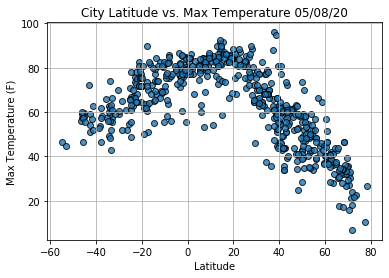

In [14]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

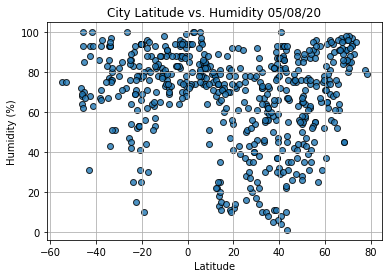

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

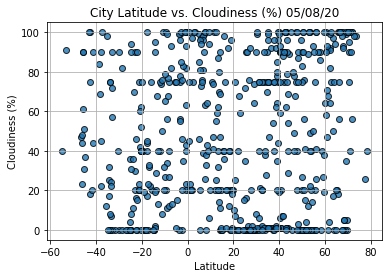

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

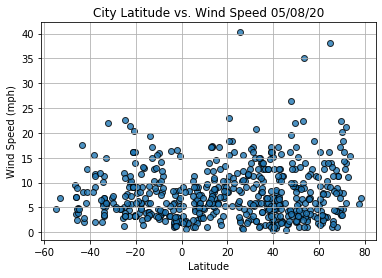

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                  Clyde River
Country                        CA
Date          2020-05-08 23:48:11
Lat                         70.47
Lng                        -68.59
Max Temp                     15.8
Humidity                       85
Cloudiness                     90
Wind Speed                  18.34
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
553     True
554    False
555    False
556    False
557     True
Name: Lat, Length: 558, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Blair,IN,2020-05-08 23:48:09,11.67,92.75,83.88,79,100,5.41
1,Qaanaaq,GL,2020-05-08 23:48:09,77.48,-69.36,10.38,81,26,5.73
3,Gat,IL,2020-05-08 23:48:09,31.61,34.76,64.99,75,21,5.32
4,Tiksi,RU,2020-05-08 23:48:10,71.69,128.87,18.10,97,100,13.89
5,Elko,US,2020-05-08 23:48:10,41.00,-115.50,77.00,8,1,4.70


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

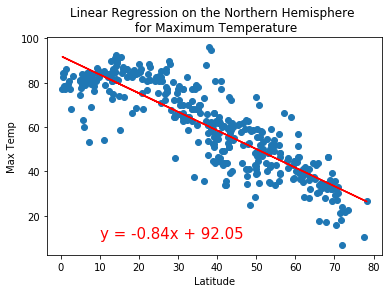

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,10))

In [25]:
linregress(x_values, y_values)

LinregressResult(slope=-0.8391313868074167, intercept=92.04896241113943, rvalue=-0.8585497766863988, pvalue=5.321848967788496e-112, stderr=0.025741496919811372)

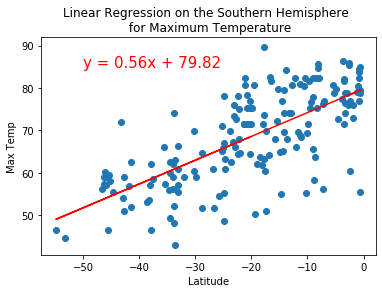

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))

In [27]:
linregress(x_values, y_values)

LinregressResult(slope=0.561757896247354, intercept=79.81978856439277, rvalue=0.7036856052771605, pvalue=9.013591879633969e-28, stderr=0.04287682277240493)

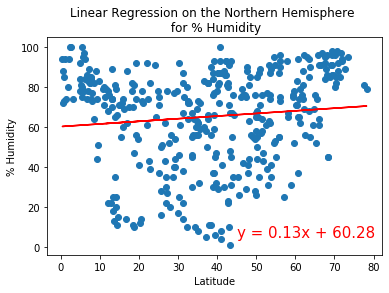

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,5))

In [29]:
linregress(x_values, y_values)

LinregressResult(slope=0.1313291390226967, intercept=60.281016532173254, rvalue=0.10872393416030686, pvalue=0.03387755418483092, stderr=0.06167855161644059)

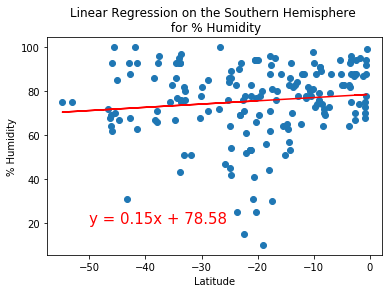

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20))

In [31]:
linregress(x_values, y_values)

LinregressResult(slope=0.14809272023228445, intercept=78.5758221677546, rvalue=0.11555758487141704, pvalue=0.12561213466932408, stderr=0.09622701348356777)

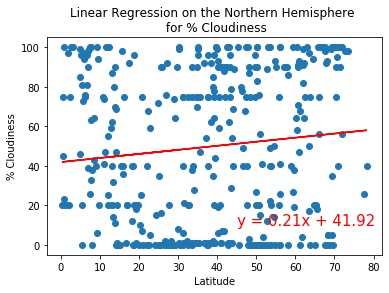

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,10))

In [33]:
linregress(x_values, y_values)

LinregressResult(slope=0.2056928835093975, intercept=41.918658604648364, rvalue=0.10645986629151813, pvalue=0.037793077948800914, stderr=0.09868215155318932)

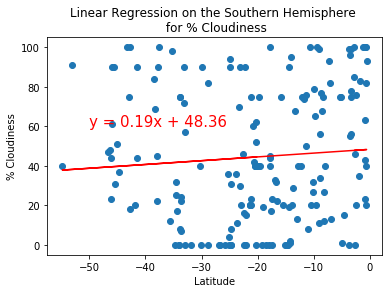

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [35]:
linregress(x_values, y_values)

LinregressResult(slope=0.19184137276988805, intercept=48.36460071114872, rvalue=0.07702937591632897, pvalue=0.3081729648537049, stderr=0.18770445641759717)

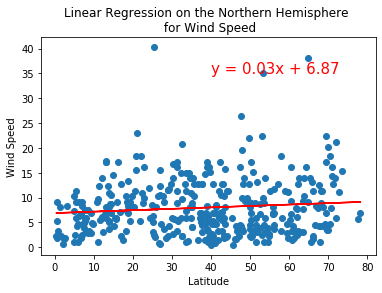

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [37]:
linregress(x_values, y_values)

LinregressResult(slope=0.028572232069541542, intercept=6.872993417519806, rvalue=0.1002320119150756, pvalue=0.050589216472864774, stderr=0.01456885843766628)

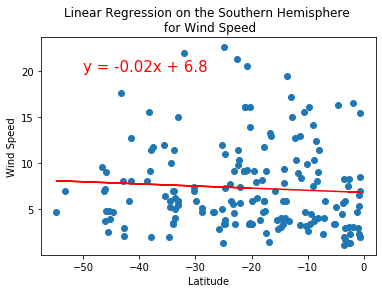

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))

In [39]:
linregress(x_values, y_values)

LinregressResult(slope=-0.02316149330086079, intercept=6.797945676458746, rvalue=-0.06730585983102476, pvalue=0.37340592494722735, stderr=0.02595426450957289)